[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dariush-bahrami/An-Observation-on-Distribution-of-Prime-Numbers/blob/master/Jupyter%20Notebooks/Paper%20-%20Figure%207%20-%20Delta%20Histogram.ipynb)

In [2]:
import sys
import math
from pathlib import Path
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
def bins_number_sturges(data_number):
    return int(math.log(data_number, 2)) + 1

In [4]:
data_dir = Path('data')
delta_frequency_path = Path.joinpath(data_dir, Path('delta_frequency_under_1b.csv'))

In [5]:
try:
    df = pd.read_csv(delta_frequency_path)
except FileNotFoundError as error:
        print(error)
        in_colab = 'google.colab' in sys.modules
        if in_colab:
            print('running on colab, downloading data to session...')
            !mkdir data
            # Download delta_frequency_under_1b.csv
            !wget https://bit.ly/3zcycOz -O data/delta_frequency_under_1b.csv
        else:
            print('Please download required data from paper repo')

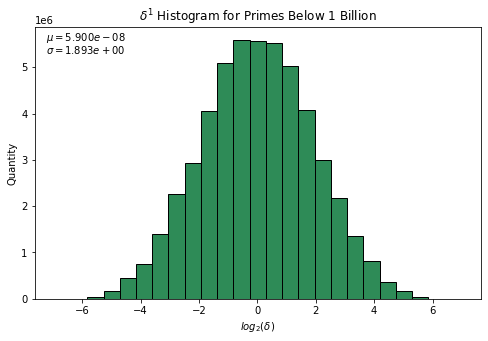

In [6]:
order = 1
figsize = (8, 5)
barplot_configs = {'color': 'seagreen',
                   'edgecolor':'black'}
plt.close()
fig = plt.gcf()
fig.set_size_inches(*figsize)

# Calculate bins and heights
data_num = df['frequency'].sum()
bins_num = bins_number_sturges(data_num) # Sturges' formula
bin_max = df['delta_log2'].max()
bin_min = df['delta_log2'].min()
bin_width = (bin_max-bin_min)/bins_num
bins = np.linspace(bin_min, bin_max, bins_num)
frequency = []
for i in range(1, bins_num):
    sub_df = df[(df['delta_log2']<bins[i]) & (df['delta_log2']>=bins[i-1])]
    frequency.append(sub_df['frequency'].sum())
frequency = np.array(frequency)
bar_width = (bin_max-bin_min)/(bins_num-1)

# Plot histogram
plt.bar(bins[:-1], frequency,
        align='edge',
        width=bar_width,
        label=f'$\delta^{order}$ Histogram',
        linewidth=1,
        **barplot_configs)

# Calculate stats
mean = (df['frequency']*df['delta_log2']).sum() / data_num
std = (((((df['delta_log2']-mean)**2)*df['frequency']).sum())/data_num)**0.5

# Extra configs
plt.title(f'$\delta^{order}$ Histogram for Primes Below 1 Billion')
plt.xlabel('$log_2(\delta)$')
plt.ylabel('Quantity')
#     plt.legend(frameon=False)
ax =plt.gca()
text1 = f'$\sigma={std:.3e}$'
ax.text(0.025, 0.90, text1, color='black', transform=ax.transAxes)
text2 = f'$\mu={mean:.3e}$'
ax.text(0.025, 0.95, text2, color='black', transform=ax.transAxes)
plt.show()